In [13]:
!pip install CSIKit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.1 MB/s eta 0:00:00


In [1]:
import os
import glob
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from CSIKit.filters.passband import bandpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/grand_final/

/content/drive/MyDrive/grand_final


In [ ]:
directory_path = './'
directory_files = os.listdir(directory_path)
print(directory_files)

['p12.dat', 'p22.dat', 'p13.dat', 'p23.dat', 'p33.dat', 'p32.dat', 'p42.dat', 'p43.dat', 'p53.dat', 'p52.dat', 'p62.dat', 'p72.dat', 'p82.dat', 'p92.dat', 'p102.dat', 'p63.dat', 'p73.dat', 'p83.dat', 'p93.dat', 'p103.dat', 'p113.dat', 'p112.dat', 'p122.dat', 'p132.dat', 'person_2.dat', 'person_1.dat', 'person_3.dat', 'person_4.dat', 'person_5.dat', 'person_14.dat', 'person_15.dat', 'person_6.dat', 'person_7.dat', 'person_8.dat', 'person_9.dat', 'person_10.dat', 'person_11.dat', 'person_12.dat', 'person_13.dat', 'amplitude']


In [ ]:
from subprocess import call

for file in directory_files:
   command = f'csikit --csv --csv_dest output-amplitude-{file} {file}' # amplitude extraction
   cmd = command.split(' ')
   call(cmd)

In [3]:
%cd /content/drive/MyDrive/grand_final/amplitude/
path = './'
amp_files = os.listdir(path)
amp_files.sort()

/content/drive/MyDrive/grand_final/amplitude


In [ ]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import math

amp_lists = glob.glob('./output-amplitude*.dat')
num_samples = len(amp_lists)
cols = 4
rows = math.ceil(num_samples / cols)
fig = plt.figure(figsize=(20, 5 * rows))
fig.suptitle("Amplitude of Raw CSI Data")

for count, file in enumerate(amp_lists):
    d = pd.read_csv(file)
    DB = d.values
    ax = plt.subplot(rows, cols, count + 1)
    ax.plot(DB[1000:1050])
    ax.set_title('-'.join(file.split('-')[2:]))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [4]:
data = read_csv(amp_files[5]) # reading a single file

In [ ]:
data.head()

,Sub 0 RXTX 0/0,Sub 0 RXTX 0/1,Sub 0 RXTX 1/0,Sub 0 RXTX 1/1,Sub 1 RXTX 0/0,Sub 1 RXTX 0/1,Sub 1 RXTX 1/0,Sub 1 RXTX 1/1,Sub 2 RXTX 0/0,Sub 2 RXTX 0/1,...,Sub 53 RXTX 1/0,Sub 53 RXTX 1/1,Sub 54 RXTX 0/0,Sub 54 RXTX 0/1,Sub 54 RXTX 1/0,Sub 54 RXTX 1/1,Sub 55 RXTX 0/0,Sub 55 RXTX 0/1,Sub 55 RXTX 1/0,Sub 55 RXTX 1/1
0,40.157788,31.945143,35.086644,33.263359,40.374265,31.798389,34.976206,34.169732,40.486360,31.583625,...,33.634239,30.318123,39.105177,26.020600,34.608978,30.445398,38.418598,24.668676,34.072209,30.530784
1,39.853366,38.351196,34.963761,39.786826,40.128794,38.276923,34.540823,40.286526,40.408001,38.149132,...,34.192947,37.004441,38.956987,32.671717,34.877039,36.754117,38.297539,31.886473,34.653829,36.547539
2,41.445431,43.120292,36.483600,44.381308,41.518293,42.933405,36.082050,44.738664,41.809856,42.965774,...,35.249151,41.690864,40.543066,35.549735,35.683191,41.388709,39.717396,35.485123,35.305839,41.414498
3,42.725378,41.631912,37.206554,43.392725,42.671013,41.330916,36.617181,43.903168,42.944001,41.728947,...,36.455205,40.000000,41.349735,34.963761,37.678976,40.588055,40.650940,33.654880,37.092700,40.344279
4,42.168781,43.038222,37.589875,44.224585,42.426656,42.987876,37.213984,44.755114,42.747119,43.185850,...,35.987905,41.481706,41.554879,36.242821,36.175245,41.631912,40.829289,35.865873,36.127839,41.685269


In [5]:
data = data.values

In [6]:
start_pos = len(data[:,0])//2 - 1500
new_csi_matrix = data[start_pos:start_pos+3000] # Chosing the 3000 packets
new_csi_matrix.shape

(3000, 224)

In [7]:
# Calculate variance of each subcarrier
variances = np.var(new_csi_matrix, axis=0)
sorted_indices = np.argsort(variances)[::-1]
selected_subcarriers = sorted_indices[:180]
selected_variances = variances[selected_subcarriers]

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [8]:
all_sub = variances[sorted_indices]

In [9]:
len(selected_variances)

180

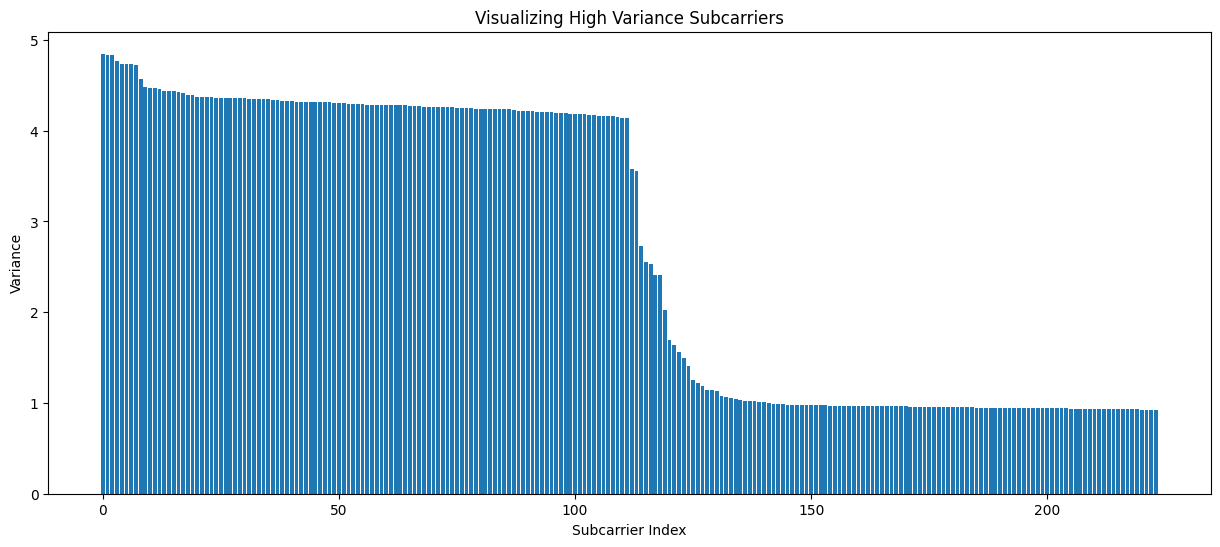

In [ ]:
# Plot each subcarrier with its variance
plt.figure(figsize=(15, 6))
plt.bar(range(len(all_sub)), all_sub)
plt.xlabel('Subcarrier Index')
plt.ylabel('Variance')
plt.title('Visualizing High Variance Subcarriers')
plt.show()

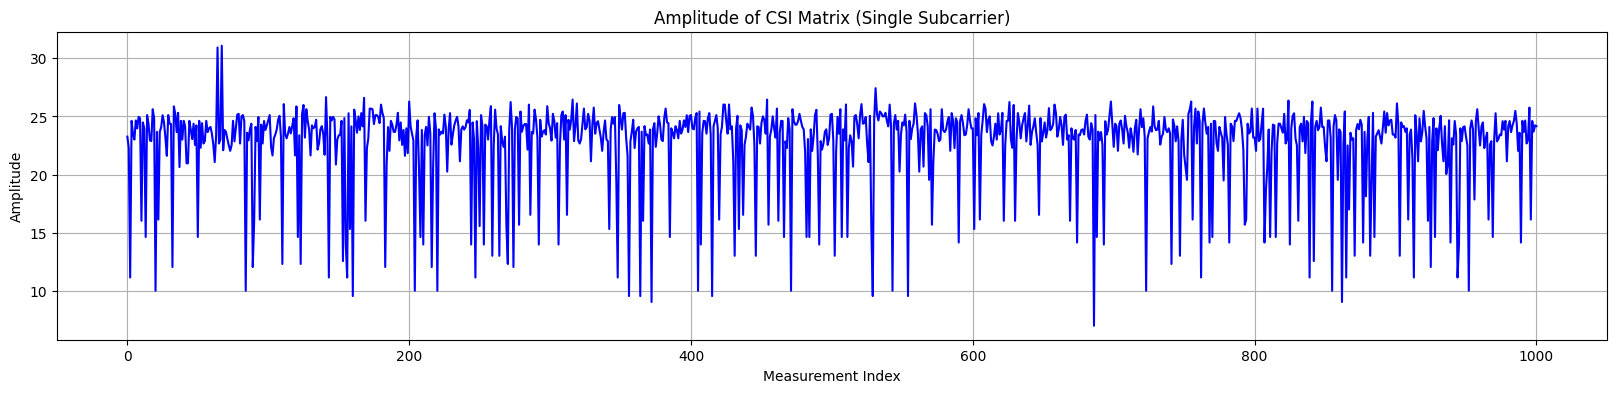

In [10]:
# Ploting Raw Amplitude Data of a sub-carrier

amplitudes = new_csi_matrix[1000:2001,90]

plt.figure(figsize=(20, 4))
plt.plot(amplitudes, color='blue', alpha=1)
plt.title('Amplitude of CSI Matrix (Single Subcarrier)')
plt.xlabel('Measurement Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [15]:
filtered_result = np.zeros(new_csi_matrix.shape)
for x in range(180):
    filtered_result[:,x] = hampel(new_csi_matrix[:,x], 30)
    filtered_result[:,x] = running_mean(filtered_result[:,x], 30)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


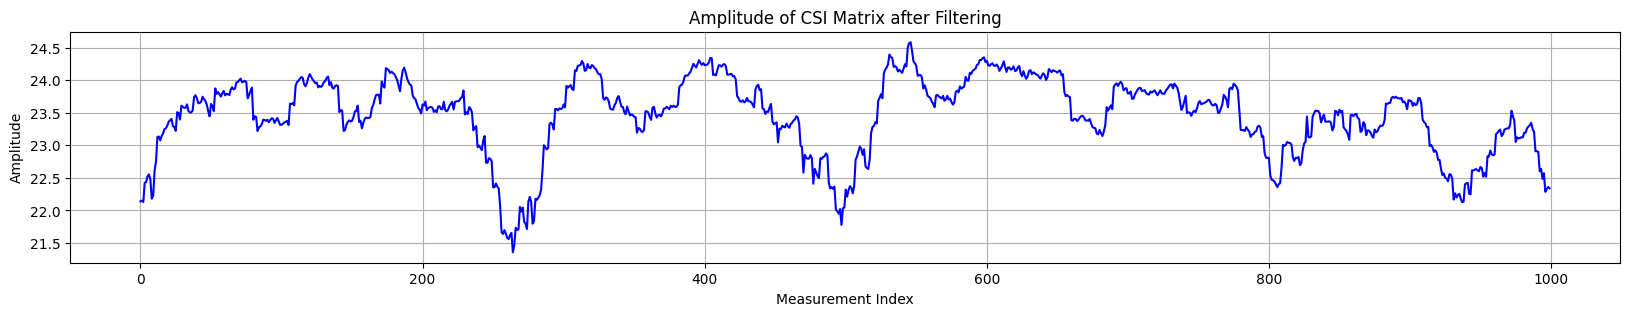

In [16]:
# Ploting Raw Amplitude Data of a sub-carrier
amplitudes = filtered_result[1000:2000,90]
plt.figure(figsize=(20, 3))
plt.plot(amplitudes, color='blue', alpha=1)
plt.title('Amplitude of CSI Matrix after Filtering')
plt.xlabel('Measurement Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [17]:
# Applying hampel filter and bandpass filter frequncy segmentaion of heart rate
filtered_csi_hr = np.zeros(new_csi_matrix.shape)
for x in range(180):
    filtered_csi_hr[:,x] = bandpass(filtered_result[:,x], 1,1.5, 50, 3)

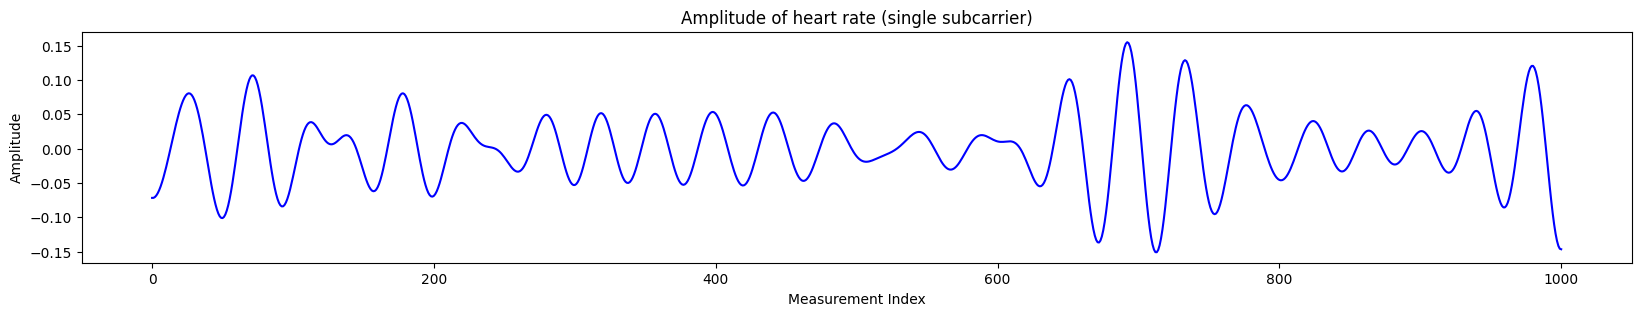

In [18]:
# Plotting filterred heart rate signal subcarrier
amplitudes = filtered_csi_hr[1000:2001,90]

plt.figure(figsize=(20, 3))
plt.plot(amplitudes, color='blue', alpha=1)
plt.title('Amplitude of heart rate (single subcarrier)')
plt.xlabel('Measurement Index')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

In [ ]:
# Applying hample filter and bandpass filter frequncy segmentaion of respiratory rate
filtered_csi_rr = np.zeros(new_csi_matrix.shape)
for x in range(180):
    filtered_csi_rr[:,x] = bandpass(filtered_result[:,x], 0.2,0.5, 50, 3)

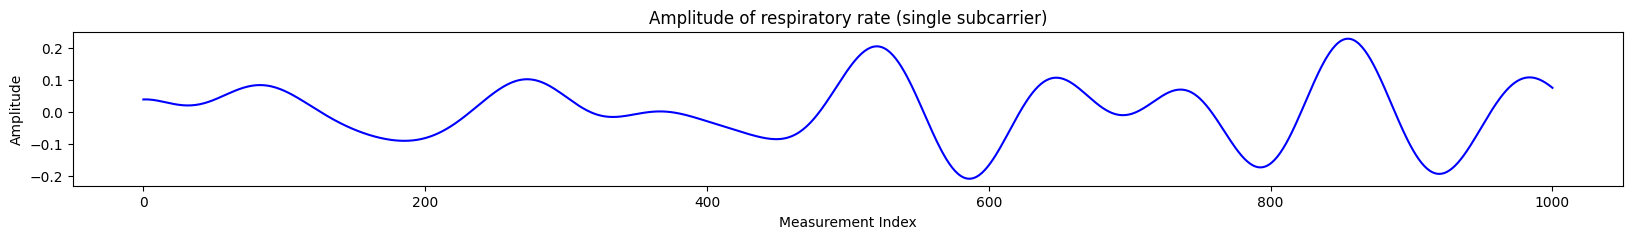

In [ ]:
amplitudes = filtered_csi_rr[1000:2001,90]

plt.figure(figsize=(20, 2))
plt.plot(amplitudes, color='blue', alpha=1)
plt.title('Amplitude of respiratory rate (single subcarrier)')
plt.xlabel('Measurement Index')
plt.ylabel('Amplitude')
plt.grid(False)
plt.show()

In [ ]:
%cd /content/drive/MyDrive/grand_final/amplitude/
path = './'
amp_files = os.listdir(path)
amp_files.sort()

/content/drive/MyDrive/grand_final/amplitude


In [ ]:
def filtering(csi_matrix):
    filtered_csi_matrix = np.zeros(csi_matrix.shape)
    for x in range(csi_matrix.shape[0]):
        filtered_csi_matrix[x] = hampel(csi_matrix[x], 30)
        filtered_csi_matrix[x] = running_mean(filtered_csi_matrix[x], 30)

    return filtered_csi_matrix

In [ ]:
def heart_rate_segmentation(csi_matrix):
    hr_csi_matrix = np.zeros(csi_matrix.shape)
    for x in range(csi_matrix.shape[0]):
        hr_csi_matrix[x] = bandpass(csi_matrix[x], 1,1.5, 50, 3)

    return hr_csi_matrix

In [ ]:
def resp_rate_segmentation(csi_matrix):
    rr_csi_matrix = np.zeros(csi_matrix.shape)
    for x in range(csi_matrix.shape[0]):
        rr_csi_matrix[x] = bandpass(csi_matrix[x], 0.2,0.5, 50, 3)

    return rr_csi_matrix

In [ ]:
def high_var_subcarrier(csi_matrix):
    variances = np.var(csi_matrix, axis=0)
    sorted_indices = np.argsort(variances)[::-1]
    selected_subcarriers = sorted_indices[:180] # Selecting 180 subcarrier

    return selected_subcarriers

In [ ]:
# This list will hold the data from all files
all_data_heart = []
all_data_resp = []

for file in amp_files:
    data = pd.read_csv(file)

    start_pos = data.shape[0] // 2 - 1500

    data = data.iloc[start_pos:start_pos + 3000] # Selecting 3000 pakcets
    csi_matrix = data.to_numpy()

    selected_subcarriers = high_var_subcarrier(csi_matrix)
    csi_matrix = csi_matrix[:, selected_subcarriers]

    # Filtering
    filtered_csi_matrix = filtering(csi_matrix)

    # Heart Rate Segmentaion
    hr_csi_matrix = heart_rate_segmentation(filtered_csi_matrix)
    hr_csi_data = pd.DataFrame(hr_csi_matrix)
    # Add to the list
    all_data_heart.append(hr_csi_data)

    # Resp Rate Segmentaion
    rr_csi_matrix = resp_rate_segmentation(filtered_csi_matrix)
    rr_csi_data = pd.DataFrame(rr_csi_matrix)
    # Add to the list
    all_data_resp.append(rr_csi_data)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: R

In [ ]:
# Now we concatenate all the data vertically
hr_amp_data = pd.concat(all_data_heart, ignore_index=True)
rr_amp_data = pd.concat(all_data_resp, ignore_index=True)

In [ ]:
hr_amp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.132623,0.083770,0.032944,-0.018618,-0.069664,-0.118957,-0.165310,-0.207618,-0.244880,-0.276230,...,0.007767,0.006479,0.005147,0.003820,0.002545,0.001360,0.000297,-0.000619,-0.001373,-0.001958
1,0.128243,0.083032,0.035958,-0.011802,-0.059055,-0.104629,-0.147401,-0.186326,-0.220466,-0.249014,...,-0.002138,-0.000542,0.000840,0.001989,0.002897,0.003565,0.004005,0.004235,0.004280,0.004168
2,0.138253,0.089245,0.038272,-0.013385,-0.064435,-0.113612,-0.159702,-0.201583,-0.238250,-0.268838,...,-0.002266,-0.000506,0.001015,0.002277,0.003273,0.004005,0.004485,0.004736,0.004782,0.004657
3,0.121895,0.074582,0.025338,-0.024687,-0.074324,-0.122414,-0.167835,-0.209535,-0.246551,-0.278038,...,0.018591,0.013717,0.009069,0.004772,0.000927,-0.002391,-0.005136,-0.007289,-0.008852,-0.009854
4,0.131218,0.082973,0.032750,-0.018234,-0.068748,-0.117575,-0.163545,-0.205565,-0.242645,-0.273926,...,0.009115,0.007234,0.005367,0.003577,0.001913,0.000419,-0.000873,-0.001944,-0.002783,-0.003390


In [ ]:
import numpy as np
import pandas as pd

# Assume hr_amp_data is already loaded as a DataFrame
rows_per_person = 3000
num_persons = len(hr_amp_data) // rows_per_person

# Create label array: [0]*3000 + [1]*3000 + ... + [14]*3000
labels = np.repeat(np.arange(num_persons), rows_per_person)

# Add to DataFrame
hr_amp_data['label'] = labels


In [ ]:
hr_amp_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,label
89995,0.122652,0.112442,0.099690,0.084632,0.067557,0.048804,0.028750,0.007805,-0.013596,-0.035008,...,0.025824,0.023324,0.020384,0.017171,0.013845,0.010554,0.007424,0.004561,0.002047,29
89996,0.141755,0.130304,0.115984,0.099028,0.079723,0.058414,0.035489,0.011379,-0.013457,-0.038537,...,0.038420,0.032886,0.027017,0.021072,0.015284,0.009854,0.004947,0.000685,-0.002852,29
89997,0.118995,0.108261,0.095046,0.079595,0.062209,0.043233,0.023053,0.002083,-0.019239,-0.040466,...,0.026151,0.023316,0.020088,0.016640,0.013131,0.009707,0.006494,0.003593,0.001078,29
89998,0.138312,0.128479,0.115942,0.100913,0.083660,0.064495,0.043774,0.021885,-0.000757,-0.023721,...,0.037282,0.033375,0.028881,0.024047,0.019104,0.014264,0.009706,0.005579,0.001991,29
89999,0.125525,0.114247,0.100338,0.084058,0.065721,0.045693,0.024380,0.002222,-0.020317,-0.042762,...,0.026545,0.023582,0.020236,0.016680,0.013078,0.009576,0.006300,0.003352,0.000807,29


In [ ]:
hr_amp_data.shape

(90000, 181)

In [ ]:
rr_amp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-1.230617,-1.199389,-1.166316,-1.131430,-1.094770,-1.056376,-1.016293,-0.974568,-0.931252,-0.886400,...,-0.083460,-0.074119,-0.065467,-0.057491,-0.050176,-0.043505,-0.037455,-0.032003,-0.027121,-0.022779
1,-1.460881,-1.432697,-1.402355,-1.369875,-1.335281,-1.298601,-1.259869,-1.219119,-1.176394,-1.131736,...,-0.110355,-0.098278,-0.087050,-0.076662,-0.067102,-0.058350,-0.050385,-0.043180,-0.036704,-0.030924
2,-1.502044,-1.473711,-1.443159,-1.410406,-1.375477,-1.338397,-1.299199,-1.257919,-1.214597,-1.169277,...,-0.115071,-0.102517,-0.090839,-0.080031,-0.070078,-0.060962,-0.052662,-0.045149,-0.038394,-0.032362
3,-0.709483,-0.670351,-0.630097,-0.588786,-0.546489,-0.503280,-0.459231,-0.414420,-0.368925,-0.322826,...,-0.019498,-0.016663,-0.014135,-0.011893,-0.009921,-0.008198,-0.006705,-0.005423,-0.004332,-0.003414
4,-1.116918,-1.084359,-1.050109,-1.014211,-0.976708,-0.937649,-0.897085,-0.855071,-0.811664,-0.766924,...,-0.068926,-0.061116,-0.053895,-0.047253,-0.041175,-0.035642,-0.030635,-0.026131,-0.022107,-0.018537


In [ ]:
# Assume hr_amp_data is already loaded as a DataFrame
rows_per_person = 3000
num_persons = len(rr_amp_data) // rows_per_person

# Create label array: [0]*3000 + [1]*3000 + ... + [29]*3000
labels = np.repeat(np.arange(num_persons), rows_per_person)

# Add to DataFrame
rr_amp_data['label'] = labels

In [ ]:
rr_amp_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,label
89995,-0.753348,-0.719637,-0.684341,-0.647508,-0.609189,-0.569441,-0.528325,-0.485905,-0.442252,-0.397437,...,-0.002267,-0.000999,0.000014,0.000798,0.001381,0.001790,0.002050,0.002184,0.002215,29
89996,-0.651843,-0.615805,-0.578295,-0.539372,-0.499094,-0.457527,-0.414740,-0.370805,-0.325799,-0.279803,...,0.013705,0.013314,0.012764,0.012087,0.011310,0.010462,0.009566,0.008645,0.007720,29
89997,-0.737066,-0.702164,-0.665702,-0.627730,-0.588303,-0.547480,-0.505326,-0.461907,-0.417297,-0.371570,...,-0.000556,0.000531,0.001373,0.001999,0.002435,0.002708,0.002843,0.002864,0.002793,29
89998,-1.006809,-0.971204,-0.933583,-0.893987,-0.852465,-0.809071,-0.763862,-0.716903,-0.668262,-0.618013,...,-0.017202,-0.014172,-0.011538,-0.009271,-0.007337,-0.005706,-0.004347,-0.003230,-0.002327,29
89999,-0.733864,-0.698654,-0.661876,-0.623579,-0.583823,-0.542666,-0.500175,-0.456420,-0.411472,-0.365411,...,0.002124,0.002929,0.003507,0.003885,0.004091,0.004152,0.004093,0.003937,0.003706,29


In [ ]:
rr_amp_data.shape

(90000, 181)

In [ ]:
hr_amp_data.to_csv("hr_amp_data_labeled.csv", index=False)

In [ ]:
rr_amp_data.to_csv("rr_amp_data_labeled.csv", index=False)